In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from models import Generator, Discriminator
from training_functions import train_gan
from helper_functions import Evaluator, visualize_reconstructions, generate_images

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Device: cuda


## Wczytanie danych

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
dataset_path = "./trafic_32"
dataset = torchvision.datasets.ImageFolder(root=dataset_path, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

labels = dataset.classes
print("Number of labels:", len(dataset.classes))

Number of labels: 43


In [3]:
train_ratio = 0.8

train_size = int(train_ratio * len(dataset))
val_size = len(dataset) - train_size

train, val = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val, batch_size=4, shuffle=True, num_workers=4)

## Podstawowy model

In [4]:
latent_dim = 32
img_dim = 3*32*32
generator = Generator(latent_dim=latent_dim, hidden_dim=256, output_dim=img_dim, image_shape=[3, 32, 32]).to(device)
discriminator = Discriminator(input_dim=img_dim, hidden_dim=256).to(device)

In [5]:
evaluator = Evaluator(img_dim, 256, n_classes=len(labels)).to(device)
evaluator.load_state_dict(torch.load("evaluator.pth"))

<All keys matched successfully>

In [6]:
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
criterion = nn.MSELoss()
val_loader = torch.utils.data.DataLoader(val, batch_size=len(val), shuffle=True, num_workers=4)
val_set = next(iter(val_loader))
train_G_hist, train_D_hist, eval_G_hist, D_fake_acc_hist, D_real_acc_hist = train_gan(generator, discriminator, train_loader, val_set[0], val_loader, generator_optimizer, discriminator_optimizer, criterion, device, evaluator.evaluate)

100%|██████████| 10/10 [07:54<00:00, 47.49s/it]


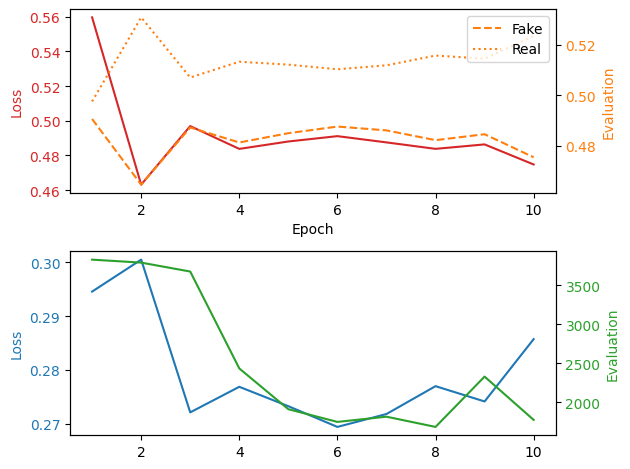

In [7]:
fig, axs = plt.subplots(2)
iters = np.arange(1, 11)
color_D_loss = "tab:red"
color_D_eval = "tab:orange"
color_G_loss = "tab:blue"
color_G_eval = "tab:green"
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss', color=color_D_loss)
axs[0].plot(iters, train_D_hist, color=color_D_loss)
axs[0].tick_params(axis='y', labelcolor=color_D_loss)
ax2 = axs[0].twinx()
ax2.set_ylabel('Evaluation', color=color_D_eval)
ax2.plot(iters, D_fake_acc_hist, color=color_D_eval, linestyle='dashed', label='Fake')
ax2.plot(iters, D_real_acc_hist, color=color_D_eval, linestyle='dotted', label='Real')
ax2.tick_params(axis='y', labelcolor=color_D_eval)
ax2.legend(loc='upper right')

axs[1].set_ylabel('Loss', color=color_G_loss)
axs[1].plot(iters, train_G_hist, color=color_G_loss)
axs[1].tick_params(axis='y', labelcolor=color_G_loss)
ax3 = axs[1].twinx()
ax3.set_ylabel('Evaluation', color=color_G_eval)
ax3.plot(iters, eval_G_hist, color=color_G_eval, linestyle='solid')
ax3.tick_params(axis='y', labelcolor=color_G_eval)

fig.tight_layout()
plt.show()

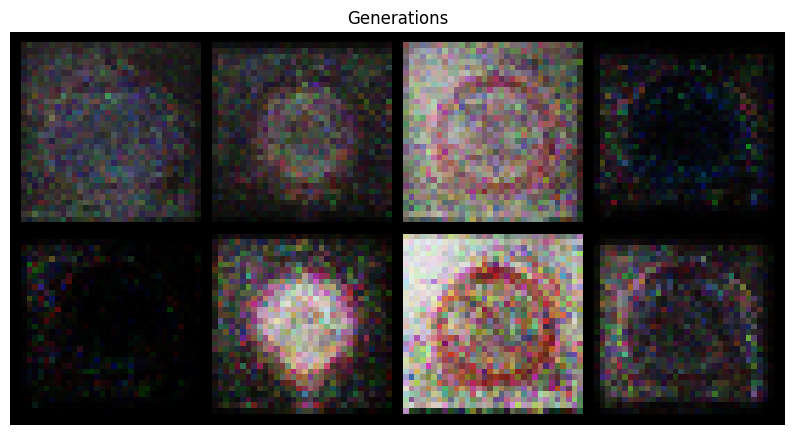

In [8]:
generate_images(generator, 8, device)

## Dodanie warstw konwolucyjnych

In [4]:
from models import ConvGenerator, ConvDiscriminator

In [5]:
latent_dim = 32
img_dim = 3*32*32
generator = ConvGenerator(latent_dim=latent_dim, hidden_dim=256, output_dim=img_dim, image_shape=[3, 32, 32]).to(device)
discriminator = ConvDiscriminator(input_dim=img_dim, hidden_dim=256, image_shape=[3, 32, 32]).to(device)

In [6]:
evaluator = Evaluator(img_dim, 256, n_classes=len(labels)).to(device)
evaluator.load_state_dict(torch.load("evaluator.pth"))

<All keys matched successfully>

In [7]:
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
criterion = nn.MSELoss()
val_loader = torch.utils.data.DataLoader(val, batch_size=len(val), shuffle=True, num_workers=4)
val_set = next(iter(val_loader))
train_G_hist, train_D_hist, eval_G_hist, D_fake_acc_hist, D_real_acc_hist = train_gan(generator, discriminator, train_loader, val_set[0], val_loader, generator_optimizer, discriminator_optimizer, criterion, device, evaluator.evaluate)

100%|██████████| 10/10 [13:05<00:00, 78.53s/it]


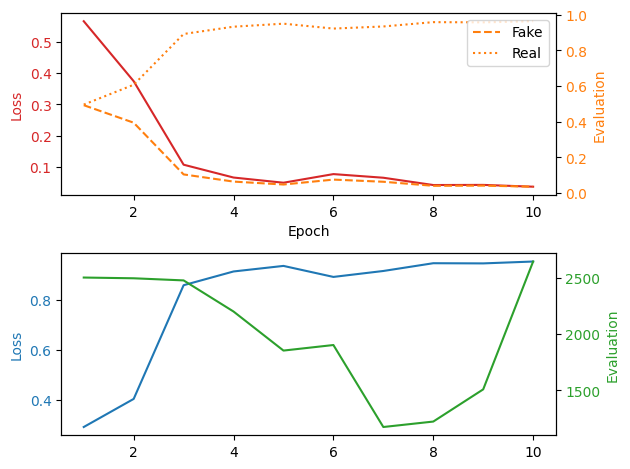

In [8]:
fig, axs = plt.subplots(2)
iters = np.arange(1, 11)
color_D_loss = "tab:red"
color_D_eval = "tab:orange"
color_G_loss = "tab:blue"
color_G_eval = "tab:green"
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss', color=color_D_loss)
axs[0].plot(iters, train_D_hist, color=color_D_loss)
axs[0].tick_params(axis='y', labelcolor=color_D_loss)
ax2 = axs[0].twinx()
ax2.set_ylabel('Evaluation', color=color_D_eval)
ax2.plot(iters, D_fake_acc_hist, color=color_D_eval, linestyle='dashed', label='Fake')
ax2.plot(iters, D_real_acc_hist, color=color_D_eval, linestyle='dotted', label='Real')
ax2.tick_params(axis='y', labelcolor=color_D_eval)
ax2.legend(loc='upper right')

axs[1].set_ylabel('Loss', color=color_G_loss)
axs[1].plot(iters, train_G_hist, color=color_G_loss)
axs[1].tick_params(axis='y', labelcolor=color_G_loss)
ax3 = axs[1].twinx()
ax3.set_ylabel('Evaluation', color=color_G_eval)
ax3.plot(iters, eval_G_hist, color=color_G_eval, linestyle='solid')
ax3.tick_params(axis='y', labelcolor=color_G_eval)

fig.tight_layout()
plt.show()

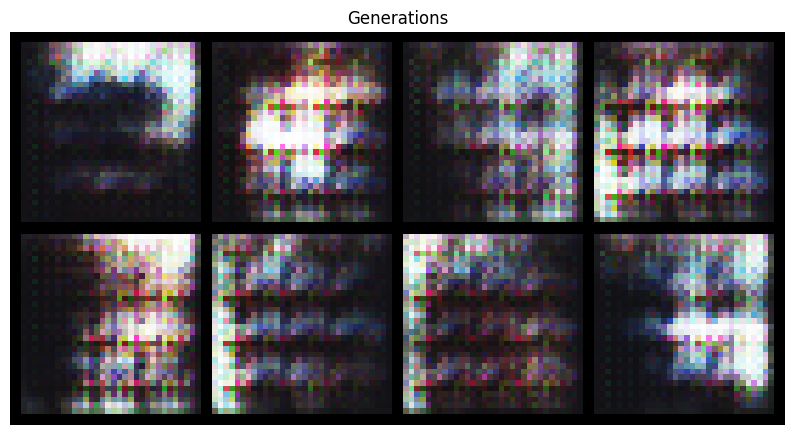

In [9]:
generate_images(generator, 8, device)

## VAEGAN

In [4]:
from models import ConvDecoder, ConvEncoder, VAE
from training_functions import train_vaegan

In [4]:
def beta_vae_loss_function(x, x_hat, mean, log_var, beta=1):
    reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    KLD      = -0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + beta * KLD

In [6]:
image_dim = 32*32*3
encoder = ConvEncoder(image_dim, hidden_dim=256, latent_dim=32, image_shape=[3, 32, 32])
decoder = ConvDecoder(latent_dim=32, hidden_dim=256, output_dim=image_dim, image_shape=[3, 32, 32])
conv_vae = VAE(encoder, decoder)
discriminator = Discriminator(input_dim=image_dim, hidden_dim=256)

In [7]:
evaluator = Evaluator(image_dim, 256, n_classes=len(labels)).to(device)
evaluator.load_state_dict(torch.load("evaluator.pth"))

<All keys matched successfully>

In [8]:
vae_optimizer = torch.optim.Adam(conv_vae.parameters(), lr=0.0001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
criterion = nn.MSELoss()
val_loader = torch.utils.data.DataLoader(val, batch_size=len(val), shuffle=True, num_workers=4)
val_set = next(iter(val_loader))
train_vae_hist, train_D_hist, eval_hist, D_fake_acc_hist, D_real_acc_hist = train_vaegan(conv_vae, discriminator, train_loader, val_set[0], vae_optimizer, discriminator_optimizer, beta_vae_loss_function, criterion, device, evaluator.evaluate)

  0%|          | 0/10 [00:00<?, ?it/s]/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 10/10 [12:21<00:00, 74.15s/it]


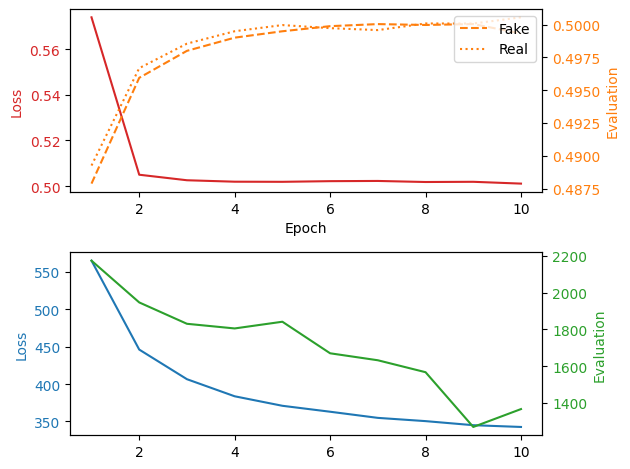

In [9]:
fig, axs = plt.subplots(2)
iters = np.arange(1, 11)
color_D_loss = "tab:red"
color_D_eval = "tab:orange"
color_vae_loss = "tab:blue"
color_vae_eval = "tab:green"

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss', color=color_D_loss)
axs[0].plot(iters, train_D_hist, color=color_D_loss)
axs[0].tick_params(axis='y', labelcolor=color_D_loss)
ax2 = axs[0].twinx()
ax2.set_ylabel('Evaluation', color=color_D_eval)
ax2.plot(iters, D_fake_acc_hist, color=color_D_eval, linestyle='dashed', label='Fake')
ax2.plot(iters, D_real_acc_hist, color=color_D_eval, linestyle='dotted', label='Real')
ax2.tick_params(axis='y', labelcolor=color_D_eval)
ax2.legend(loc='upper right')

axs[1].set_ylabel('Loss', color=color_vae_loss)
axs[1].plot(iters, train_vae_hist, color=color_vae_loss)
axs[1].tick_params(axis='y', labelcolor=color_vae_loss)
ax3 = axs[1].twinx()
ax3.set_ylabel('Evaluation', color=color_vae_eval)
ax3.plot(iters, eval_hist, color=color_vae_eval, linestyle='solid')
ax3.tick_params(axis='y', labelcolor=color_vae_eval)

fig.tight_layout()
plt.show()

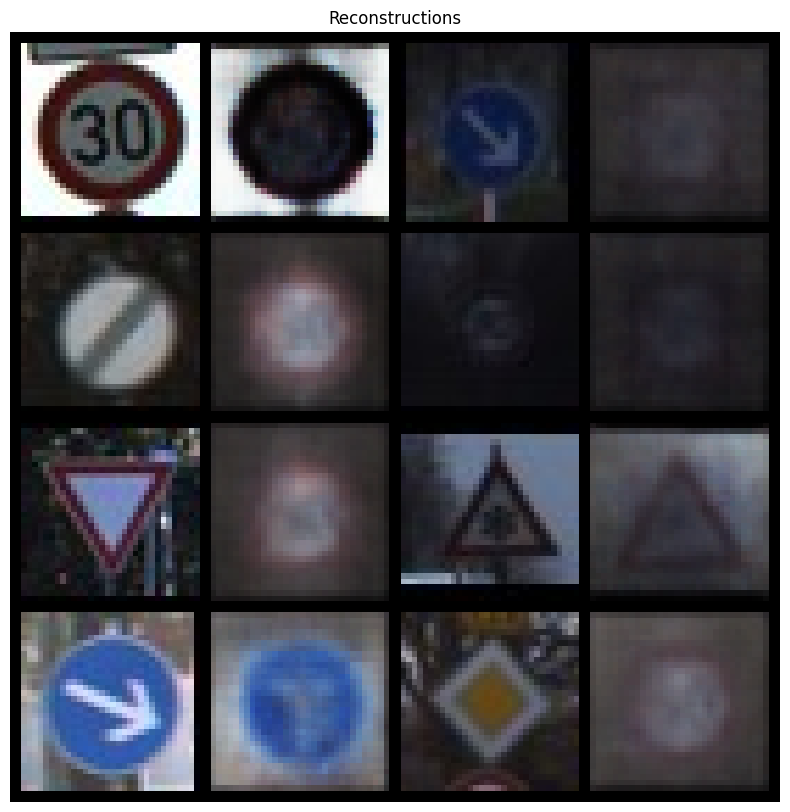

In [10]:
visualize_reconstructions(conv_vae, val_set[0][:8], device)

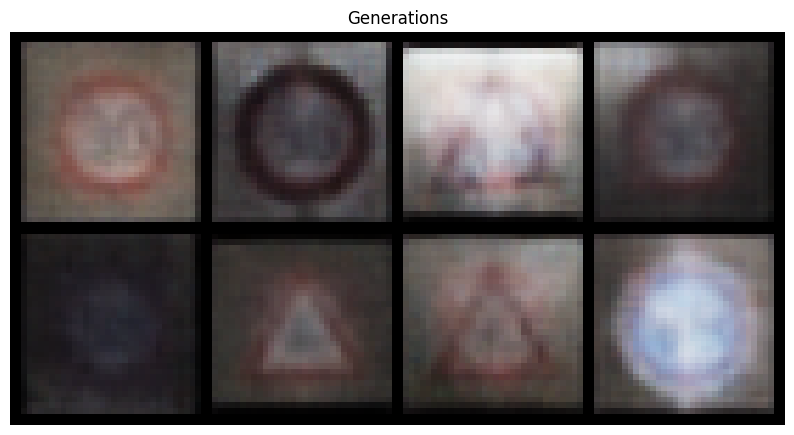

In [14]:
generate_images(conv_vae.decoder, 8, device)

## Powiększenie struktury modelu

In [24]:
from models import ConvDecoder, ConvEncoder, VAE
from training_functions import train_vaegan

image_dim = 32*32*3
encoder = ConvEncoder(image_dim, hidden_dim=512, latent_dim=32, image_shape=[3, 32, 32], hidden_layers=4)
decoder = ConvDecoder(latent_dim=32, hidden_dim=512, output_dim=image_dim, image_shape=[3, 32, 32], hidden_layers=4)
conv_vae = VAE(encoder, decoder)
discriminator = Discriminator(input_dim=image_dim, hidden_dim=512, hidden_layers=4)

evaluator = Evaluator(image_dim, 256, n_classes=len(labels)).to(device)
evaluator.load_state_dict(torch.load("evaluator.pth"))

vae_optimizer = torch.optim.Adam(conv_vae.parameters(), lr=0.001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

train_vae_hist, train_D_hist, eval_hist, D_fake_acc_hist, D_real_acc_hist = train_vaegan(conv_vae, discriminator, train_loader, val_set[0], vae_optimizer, discriminator_optimizer, beta_vae_loss_function, criterion, device, evaluator.evaluate, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 50/50 [1:19:15<00:00, 95.11s/it] 


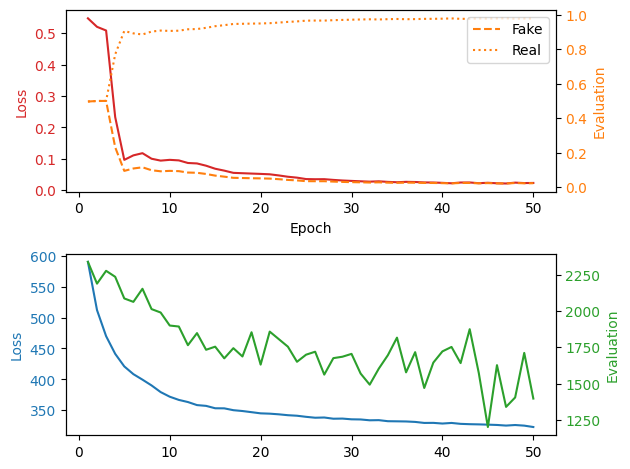

In [26]:
fig, axs = plt.subplots(2)
iters = np.arange(1, 51)
color_D_loss = "tab:red"
color_D_eval = "tab:orange"
color_vae_loss = "tab:blue"
color_vae_eval = "tab:green"

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss', color=color_D_loss)
axs[0].plot(iters, train_D_hist, color=color_D_loss)
axs[0].tick_params(axis='y', labelcolor=color_D_loss)
ax2 = axs[0].twinx()
ax2.set_ylabel('Evaluation', color=color_D_eval)
ax2.plot(iters, D_fake_acc_hist, color=color_D_eval, linestyle='dashed', label='Fake')
ax2.plot(iters, D_real_acc_hist, color=color_D_eval, linestyle='dotted', label='Real')
ax2.tick_params(axis='y', labelcolor=color_D_eval)
ax2.legend(loc='upper right')

axs[1].set_ylabel('Loss', color=color_vae_loss)
axs[1].plot(iters, train_vae_hist, color=color_vae_loss)
axs[1].tick_params(axis='y', labelcolor=color_vae_loss)
ax3 = axs[1].twinx()
ax3.set_ylabel('Evaluation', color=color_vae_eval)
ax3.plot(iters, eval_hist, color=color_vae_eval, linestyle='solid')
ax3.tick_params(axis='y', labelcolor=color_vae_eval)

fig.tight_layout()
plt.show()

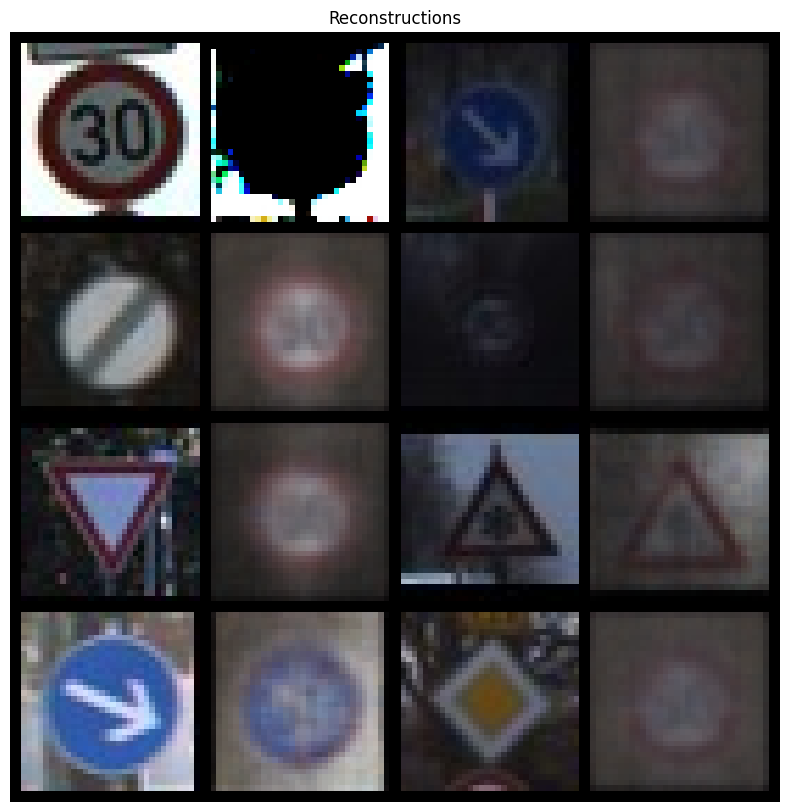

In [27]:
visualize_reconstructions(conv_vae, val_set[0][:8], device)

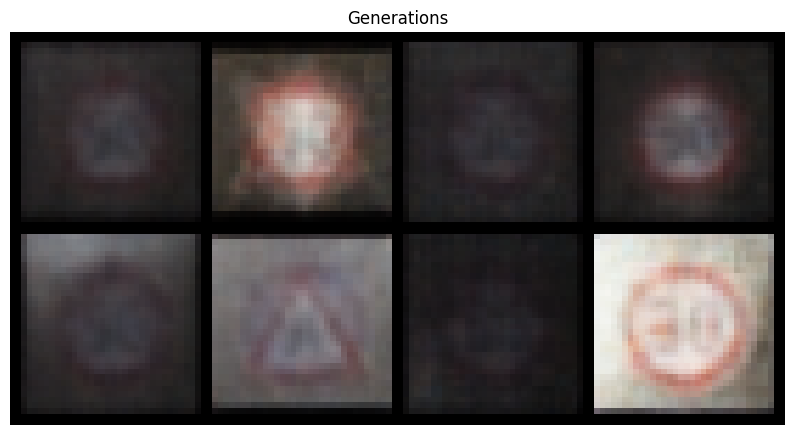

In [28]:
generate_images(conv_vae.decoder, 8, device)

In [29]:
torch.save(conv_vae.state_dict(), "big_conv_vae.pth")
torch.save(discriminator.state_dict(), "big_discriminator.pth")

## Dodanie warunkowania klasą

In [4]:
from models import ConvCEncoder, ConvCDecoder, ConvCVAE, CDiscriminator
from training_functions import train_cvaegan
from helper_functions import calculate_frechet_distance

In [5]:
def beta_vae_loss_function(x, x_hat, mean, log_var, beta=1):
    reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    KLD      = -0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + beta * KLD

In [23]:
image_dim = 32*32*3
encoder = ConvCEncoder(image_dim, hidden_dim=512, latent_dim=32, image_shape=[3, 32, 32], hidden_layers=4, num_classes=len(labels))
decoder = ConvCDecoder(latent_dim=32, hidden_dim=512, output_dim=image_dim, image_shape=[3, 32, 32], hidden_layers=4, num_classes=len(labels))
conv_c_vae = ConvCVAE(encoder, decoder, num_classes=len(labels))
discriminator = CDiscriminator(input_dim=image_dim, hidden_dim=512, num_classes=len(labels))

evaluator = Evaluator(image_dim, 256, n_classes=len(labels)).to(device)
evaluator.load_state_dict(torch.load("evaluator.pth"))
criterion = nn.MSELoss()

vae_optimizer = torch.optim.Adam(conv_c_vae.parameters(), lr=0.001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

def five_beta(x, x_hat, mean, log_var):
    return beta_vae_loss_function(x, x_hat, mean, log_var, beta=5)

def class_evaluator(eval, model, orig_data, device, latent_dim=32, n_gen=100):
    with torch.no_grad():
        fixed_noise = torch.randn(n_gen, latent_dim, device=device)
        y = torch.randint(0, len(labels), (n_gen,))
        generations = model(fixed_noise, y[:n_gen].to(device))
        dist_orig_data = eval.get_features(orig_data[:n_gen].to(device)).cpu()
        dist_gen = eval.get_features(generations.to(device)).cpu()
        return calculate_frechet_distance(dist_orig_data.numpy(), dist_gen.numpy())

val_loader = torch.utils.data.DataLoader(val, batch_size=len(val), shuffle=True, num_workers=4)
val_set = next(iter(val_loader))
train_vae_hist, train_D_hist, eval_hist, D_fake_acc_hist, D_real_acc_hist = train_cvaegan(conv_c_vae, discriminator, train_loader, val_set[0], vae_optimizer, discriminator_optimizer, five_beta, criterion, device, class_evaluator, evaluator, epochs=50)

100%|██████████| 50/50 [1:12:25<00:00, 86.92s/it]


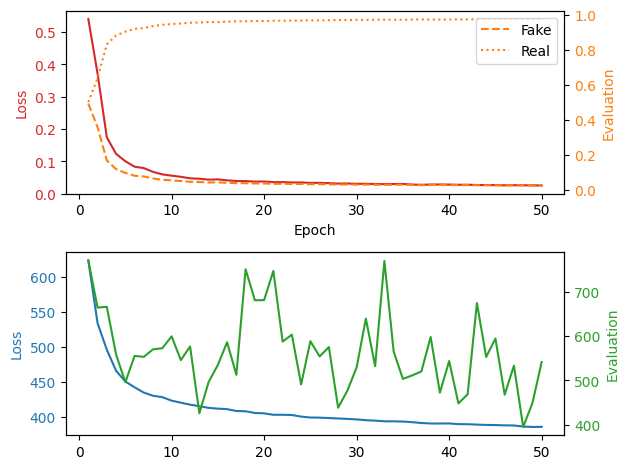

In [25]:
fig, axs = plt.subplots(2)
iters = np.arange(1, 51)
color_D_loss = "tab:red"
color_D_eval = "tab:orange"
color_vae_loss = "tab:blue"
color_vae_eval = "tab:green"

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss', color=color_D_loss)
axs[0].plot(iters, train_D_hist, color=color_D_loss)
axs[0].tick_params(axis='y', labelcolor=color_D_loss)
ax2 = axs[0].twinx()
ax2.set_ylabel('Evaluation', color=color_D_eval)
ax2.plot(iters, D_fake_acc_hist, color=color_D_eval, linestyle='dashed', label='Fake')
ax2.plot(iters, D_real_acc_hist, color=color_D_eval, linestyle='dotted', label='Real')
ax2.tick_params(axis='y', labelcolor=color_D_eval)
ax2.legend(loc='upper right')

axs[1].set_ylabel('Loss', color=color_vae_loss)
axs[1].plot(iters, train_vae_hist, color=color_vae_loss)
axs[1].tick_params(axis='y', labelcolor=color_vae_loss)
ax3 = axs[1].twinx()
ax3.set_ylabel('Evaluation', color=color_vae_eval)
ax3.plot(iters, eval_hist, color=color_vae_eval, linestyle='solid')
ax3.tick_params(axis='y', labelcolor=color_vae_eval)

fig.tight_layout()
plt.show()

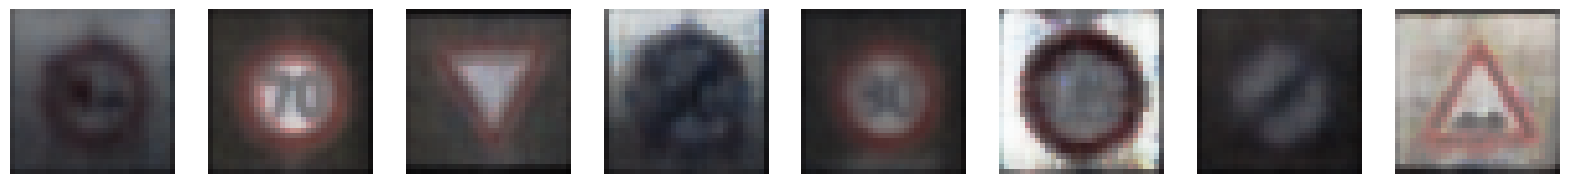

In [26]:
def generate_images_conditional(model, n_gen, device, n_classes=len(labels)):
    with torch.no_grad():
        fixed_noise = torch.randn(n_gen, 32, device=device)
        y = torch.randint(0, n_classes, (n_gen,))
        generations = model.decoder(fixed_noise, y[:n_gen].to(device))
        fig, axs = plt.subplots(1, n_gen, figsize=(20, 20))
        for i in range(n_gen):
            img = generations[i].cpu().numpy().transpose(1, 2, 0)
            axs[i].imshow(img)
            axs[i].axis("off")
        plt.show()

generate_images_conditional(conv_c_vae, 8, device)

In [27]:
torch.save(conv_c_vae.state_dict(), "big_conv_c_vae.pth")
torch.save(discriminator.state_dict(), "big_c_discriminator.pth")

## Dobranie hiperparametrów

In [4]:
import optuna
from models import ConvCEncoder, ConvCDecoder, ConvCVAE, CDiscriminator
from training_functions import train_cvaegan
from helper_functions import calculate_frechet_distance

val_loader = torch.utils.data.DataLoader(val, batch_size=len(val), shuffle=True, num_workers=4)
val_set = next(iter(val_loader))

In [5]:
def define_model(trial):
    vae_hidden_dim_values = [64, 128, 256, 512]
    d_hidden_dim_values = [64, 128, 256, 512]
    hidden_layers_values = [2, 3, 4, 5]

    vae_hidden_size = trial.suggest_categorical('vae_hidden_size', vae_hidden_dim_values)
    d_hidden_size = trial.suggest_categorical('d_hidden_size', d_hidden_dim_values)
    hidden_layers = trial.suggest_categorical('hidden_layers', hidden_layers_values)

    image_dim = 32*32*3
    encoder = ConvCEncoder(image_dim, hidden_dim=vae_hidden_size, latent_dim=32, image_shape=[3, 32, 32], hidden_layers=hidden_layers, num_classes=len(labels))
    decoder = ConvCDecoder(latent_dim=32, hidden_dim=vae_hidden_size, output_dim=image_dim, image_shape=[3, 32, 32], hidden_layers=hidden_layers, num_classes=len(labels))
    vae = ConvCVAE(encoder, decoder, num_classes=len(labels))
    discriminator = CDiscriminator(input_dim=image_dim, hidden_dim=d_hidden_size, num_classes=len(labels))
    return vae, discriminator
    

def objective(trial):
    image_dim = 32*32*3
    beta_values = [1, 5, 10, 25, 50]
    beta = trial.suggest_categorical('beta', beta_values)

    vae, discriminator = define_model(trial)
    criterion = nn.MSELoss()

    vae_optimizer = torch.optim.Adam(vae.parameters(), lr=trial.suggest_float('learning_rate_v', 1e-4, 1e-2))
    discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=trial.suggest_float('learning_rate_d', 1e-4, 1e-2))

    train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True, num_workers=0)
    def beta_vae_loss_function(x, x_hat, mean, log_var, beta=1):
        reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
        KLD      = -0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

        return reproduction_loss + beta * KLD

    def f_beta(x, x_hat, mean, log_var):
        return beta_vae_loss_function(x, x_hat, mean, log_var, beta=beta)

    def class_evaluator(eval, model, orig_data, device, latent_dim=32, n_gen=100):
        with torch.no_grad():
            fixed_noise = torch.randn(n_gen, latent_dim, device=device)
            y = torch.randint(0, len(labels), (n_gen,))
            generations = model(fixed_noise, y[:n_gen].to(device))
            dist_orig_data = eval.get_features(orig_data[:n_gen].to(device)).cpu()
            dist_gen = eval.get_features(generations.to(device)).cpu()
            return calculate_frechet_distance(dist_orig_data.numpy(), dist_gen.numpy())

    evaluator = Evaluator(image_dim, 256, n_classes=len(labels)).to(device)
    evaluator.load_state_dict(torch.load("evaluator.pth"))

    try:
        train_vae_hist, train_D_hist, eval_hist, D_fake_acc_hist, D_real_acc_hist = train_cvaegan(vae, discriminator, train_loader, val_set[0], vae_optimizer, discriminator_optimizer, f_beta, criterion, device, class_evaluator, evaluator, epochs=15, verbose=False)
    except Exception as e:
        return np.inf
    
    return sum(eval_hist[-3:]) / 3


In [6]:
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(n_startup_trials=5))
study.optimize(objective, n_trials=20, timeout=3600, n_jobs=4)

best_params = study.best_params
for key, value in best_params.items():
    print(f"{key}: {value}")

[I 2024-05-12 18:10:13,668] A new study created in memory with name: no-name-5db5d0d8-e26b-4fbd-9487-0d4058fdaee3
/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[I 2024-05-12 18:24:47,221] Trial 0 finished with value: 697.476041412799 and parameters

beta: 1
vae_hidden_size: 512
d_hidden_size: 64
hidden_layers: 3
learning_rate_v: 0.007694442134928106
learning_rate_d: 0.007245666018559598


/tmp/ipykernel_62984/2496925414.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



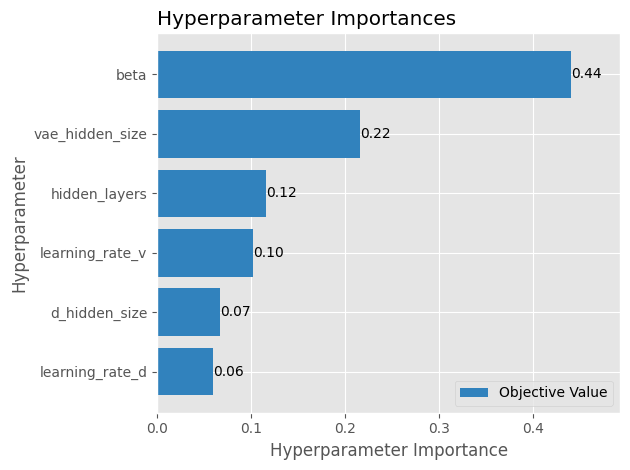

In [12]:
fig = optuna.visualization.matplotlib.plot_param_importances(study)
plt.tight_layout()
plt.show()

/tmp/ipykernel_62984/1726751459.py:1: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in the future.

[W 2024-05-12 19:34:41,418] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


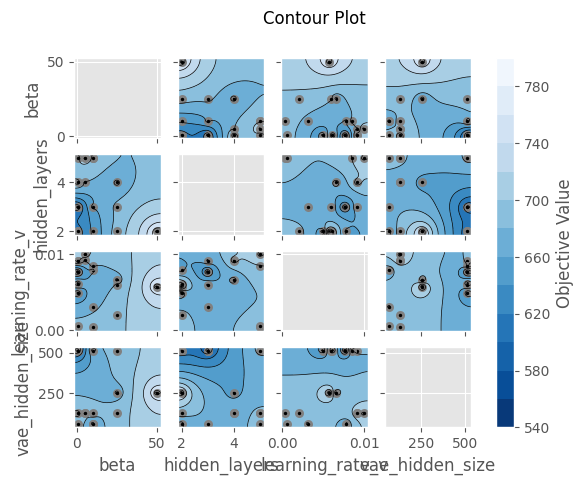

In [21]:
fig = optuna.visualization.matplotlib.plot_contour(study, params=['learning_rate_v', 'vae_hidden_size', 'hidden_layers', 'beta'])
plt.show()

## Finałowy model

In [22]:
from models import ConvCEncoder, ConvCDecoder, ConvCVAE, CDiscriminator
from training_functions import train_cvaegan
from helper_functions import calculate_frechet_distance

In [23]:
def beta_vae_loss_function(x, x_hat, mean, log_var, beta=1):
    reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    KLD      = -0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + beta * KLD

In [24]:
image_dim = 32*32*3
encoder = ConvCEncoder(image_dim, hidden_dim=512, latent_dim=32, image_shape=[3, 32, 32], hidden_layers=3, num_classes=len(labels))
decoder = ConvCDecoder(latent_dim=32, hidden_dim=512, output_dim=image_dim, image_shape=[3, 32, 32], hidden_layers=3, num_classes=len(labels))
conv_c_vae = ConvCVAE(encoder, decoder, num_classes=len(labels))
discriminator = CDiscriminator(input_dim=image_dim, hidden_dim=64, num_classes=len(labels))

evaluator = Evaluator(image_dim, 256, n_classes=len(labels)).to(device)
evaluator.load_state_dict(torch.load("evaluator.pth"))
criterion = nn.MSELoss()

vae_optimizer = torch.optim.Adam(conv_c_vae.parameters(), lr=0.0075)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0075)

def class_evaluator(eval, model, orig_data, device, latent_dim=32, n_gen=100):
    with torch.no_grad():
        fixed_noise = torch.randn(n_gen, latent_dim, device=device)
        y = torch.randint(0, len(labels), (n_gen,))
        generations = model(fixed_noise, y[:n_gen].to(device))
        dist_orig_data = eval.get_features(orig_data[:n_gen].to(device)).cpu()
        dist_gen = eval.get_features(generations.to(device)).cpu()
        return calculate_frechet_distance(dist_orig_data.numpy(), dist_gen.numpy())

val_loader = torch.utils.data.DataLoader(val, batch_size=len(val), shuffle=True, num_workers=4)
val_set = next(iter(val_loader))
train_vae_hist, train_D_hist, eval_hist, D_fake_acc_hist, D_real_acc_hist = train_cvaegan(conv_c_vae, discriminator, train_loader, val_set[0], vae_optimizer, discriminator_optimizer, beta_vae_loss_function, criterion, device, class_evaluator, evaluator, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning:

Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.

/home/bruno/OneDrive/homework/studia/SEM4/SSNE/LAB/projekty/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning:

Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.

100%|██████████| 50/50 [2:07:52<00:00, 153.44s/it]  


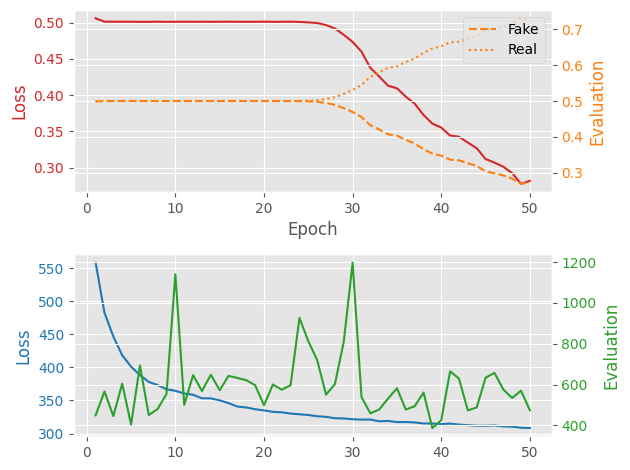

In [25]:
fig, axs = plt.subplots(2)
iters = np.arange(1, 51)
color_D_loss = "tab:red"
color_D_eval = "tab:orange"
color_vae_loss = "tab:blue"
color_vae_eval = "tab:green"

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss', color=color_D_loss)
axs[0].plot(iters, train_D_hist, color=color_D_loss)
axs[0].tick_params(axis='y', labelcolor=color_D_loss)
ax2 = axs[0].twinx()
ax2.set_ylabel('Evaluation', color=color_D_eval)
ax2.plot(iters, D_fake_acc_hist, color=color_D_eval, linestyle='dashed', label='Fake')
ax2.plot(iters, D_real_acc_hist, color=color_D_eval, linestyle='dotted', label='Real')
ax2.tick_params(axis='y', labelcolor=color_D_eval)
ax2.legend(loc='upper right')

axs[1].set_ylabel('Loss', color=color_vae_loss)
axs[1].plot(iters, train_vae_hist, color=color_vae_loss)
axs[1].tick_params(axis='y', labelcolor=color_vae_loss)
ax3 = axs[1].twinx()
ax3.set_ylabel('Evaluation', color=color_vae_eval)
ax3.plot(iters, eval_hist, color=color_vae_eval, linestyle='solid')
ax3.tick_params(axis='y', labelcolor=color_vae_eval)

fig.tight_layout()
plt.show()

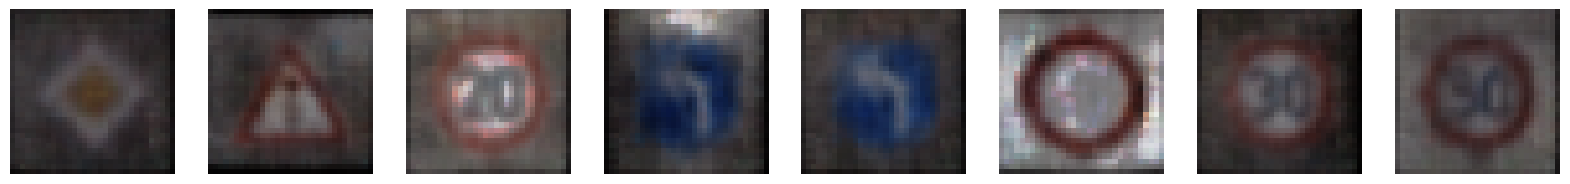

In [26]:
def generate_images_conditional(model, n_gen, device, n_classes=len(labels)):
    with torch.no_grad():
        fixed_noise = torch.randn(n_gen, 32, device=device)
        y = torch.randint(0, n_classes, (n_gen,))
        generations = model.decoder(fixed_noise, y[:n_gen].to(device))
        fig, axs = plt.subplots(1, n_gen, figsize=(20, 20))
        for i in range(n_gen):
            img = generations[i].cpu().numpy().transpose(1, 2, 0)
            axs[i].imshow(img)
            axs[i].axis("off")
        plt.show()

generate_images_conditional(conv_c_vae, 8, device)

In [27]:
with torch.no_grad():
    fixed_noise = torch.randn(1000, 32, device=device)
    y = torch.randint(0, len(labels), (1000,))
    generations = conv_c_vae.decoder(fixed_noise, y.to(device))
    torch.save(generations.cpu().detach(), "piątek_sienkiewicz.pt")